In [1]:
from manim import *


image_back_scene_main = f" -v WARNING --disable_caching -r {1024},{1024} -s image_back_Scene"

Manim Community v0.19.0

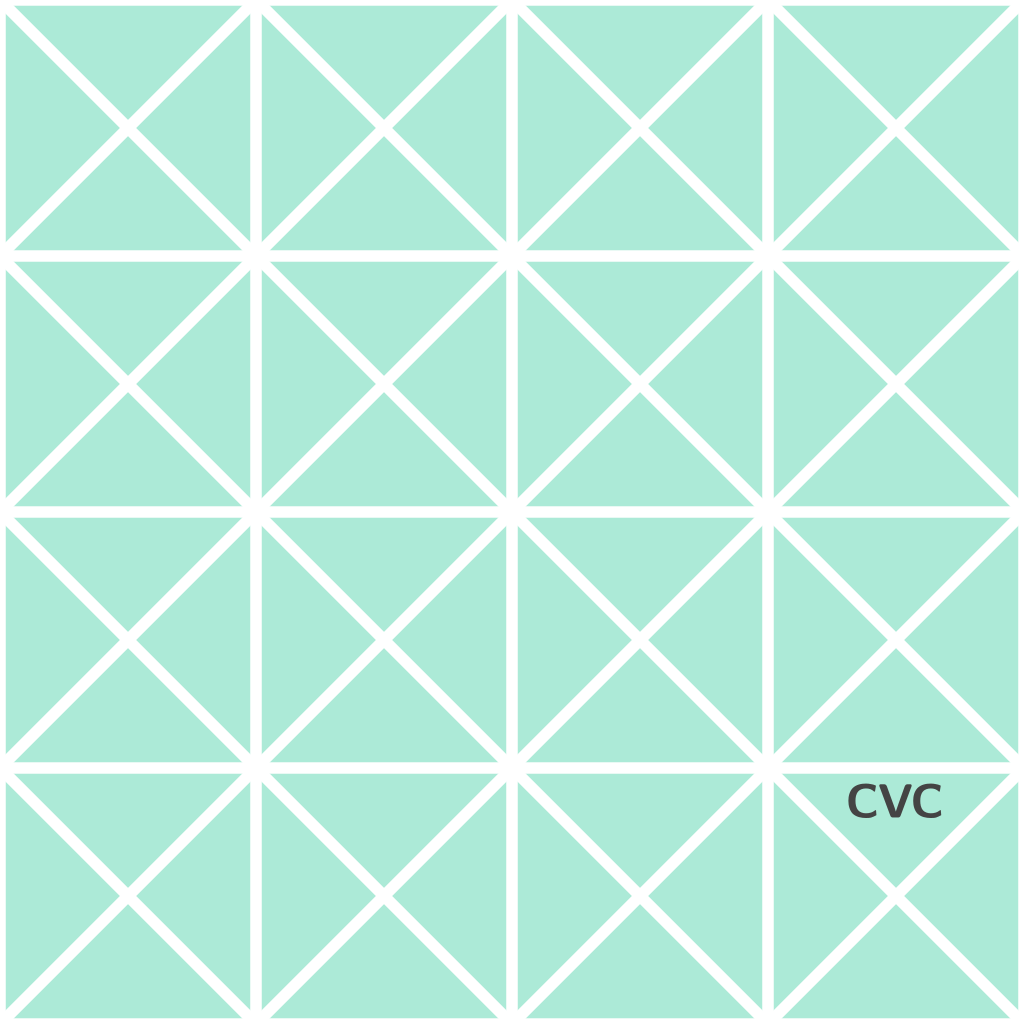

In [8]:
%%manim -qh --fps 60 $image_back_scene_main


class image_back_Scene(Scene):
    def construct(self):
        self.camera.background_color = TEAL_A
        CVC = Text('CVC', font_size = 16, weight = BOLD, color = DARK_GRAY, font = 'Latin Modern Sans').scale(3).align_on_border(RIGHT + DOWN, buff = 0.5).shift(0.75*DOWN+0.65*LEFT)
        self.add(CVC)

        # geometry of the rectangles
        screen_width = 8*1.7777777777777777777777777
        quadrant_width = screen_width / 4
        tl_origin = np.array([-2*quadrant_width, 2*quadrant_width, 0])
        stroke_width = 16


        # m x n matrix coordinates
        def get_cross_light(m, n):
            tl_line_start = tl_origin + np.array([m*quadrant_width, -n*quadrant_width, 0])
            tl_line_end = tl_origin + np.array([(m+1)*quadrant_width, -(n+1)*quadrant_width, 0])

            dl_line_start = tl_origin + np.array([(m+1)*quadrant_width, -n*quadrant_width, 0])
            dl_line_end = tl_origin + np.array([(m)*quadrant_width, -(n+1)*quadrant_width, 0])

            tl_line = Line(start = tl_line_start, end = tl_line_end, stroke_width = stroke_width, color = WHITE)
            dl_line = Line(start = dl_line_start, end = dl_line_end, stroke_width = stroke_width, color = WHITE)
            return VGroup(tl_line, dl_line)


        def get_cross_dark(m, n):
            tl_line_start = tl_origin + np.array([m*quadrant_width, -n*quadrant_width, 0])
            tl_line_end = tl_origin + np.array([(m+1)*quadrant_width, -(n+1)*quadrant_width, 0])

            dl_line_start = tl_origin + np.array([(m+1)*quadrant_width, -n*quadrant_width, 0])
            dl_line_end = tl_origin + np.array([(m)*quadrant_width, -(n+1)*quadrant_width, 0])

            tl_line = Line(start = tl_line_start, end = tl_line_end, stroke_width = stroke_width/4, color = DARK_GREY)
            dl_line = Line(start = dl_line_start, end = dl_line_end, stroke_width = stroke_width/4, color = DARK_GREY)
            return VGroup(tl_line, dl_line)


        # produce light lines
        full_screen_rectangle_light = Rectangle(height = screen_width, width = screen_width, grid_xstep = screen_width/4, grid_ystep = screen_width/4, stroke_width = stroke_width, color = WHITE)
        full_screen_rectangle_light.grid_lines.set_stroke(width = stroke_width)

        for m in range(4):
            for n in range(4):
                self.add(get_cross_light(m, n))


        # produce dark lines
        full_screen_rectangle_dark = Rectangle(height = screen_width, width = screen_width, grid_xstep = screen_width/4, grid_ystep = screen_width/4, stroke_width = stroke_width/4, color = DARK_GREY)
        full_screen_rectangle_dark.grid_lines.set_stroke(width = stroke_width/4)

        self.add(full_screen_rectangle_light)